# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Auto-Correlation Function

[Correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) is a statistical measure for the dependencies between random processes or between the samples of one random process. The [auto-correlation function](https://en.wikipedia.org/wiki/Autocorrelation) (ACF) characterizes the temporal dependencies within one random signal $x[k]$. It is an important measure for the analysis of signals in communications engineering, source coding and system identification.

### Definition

For a continuous-amplitude real-valued random signal $x[k]$ the ACF is defined by the [second-order ensemble avarage](ensemble_averages.ipynb#Second-Order-Ensemble-Averages) of the signal at two different time-instants $k_1$ and $k_2$

\begin{equation}
\varphi_{xx}[k_1, k_2] = E\{ x[k_1] \cdot x[k_2] \}
\end{equation}

Under the assumption of [wide-sense stationarity](stationary_ergodic.ipynb#Wide-Sense-Stationary-Random-Processes) (WSS) the ACF does only depend on the difference $\kappa = k_1 - k_2$ between the considered sample indexes

\begin{equation}
\varphi_{xx}[\kappa] = E\{x[k] \cdot x[k-\kappa] \}
\end{equation}

where $\kappa$ is commonly chosen as sample index instead of $k$ in order to indicate that it denotes a shift/lag. The ACF quantifies the similarity of a signal with a shifted version of itself. It has high values for high similarity and low values for low similarity.

If the process is additionally [wide-sense ergodic](stationary_ergodic.ipynb#Wide-Sense-Ergodic-Random-Processes), the ACF can be computed by averaging along one sample function

\begin{equation}
\varphi_{xx}[\kappa] = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k] \cdot x[k-\kappa]
\end{equation}

Note that the normalization on the left side of the sum is discarded in some definitions of the ACF. Above summation resembles strongly the definition of the [discrete convolution](https://en.wikipedia.org/wiki/Convolution#Discrete_convolution). For a random signal $x_N[k] = \text{rect}_N[k] \cdot x[k]$ of finite length $N$ and by exploiting the properties of a wide-sense ergodic random process one yields

\begin{equation}
\varphi_{xx}[\kappa] = \frac{1}{N} \sum_{k=0}^{N-1} x_N[k] \cdot x_N[k-\kappa] = \frac{1}{N} \; x_N[k] * x_N[-k]
\end{equation}

where the ACF $\varphi_{xx}[\kappa] = 0$ for $|\kappa| > N-1$. Hence, the ACF can be computed by (fast) convolution of the random signal with a time reversed version of itself. 

Note in numerical implementations (e.g. MATLAB, Python), the computed ACF is stored in a vector of length $2 N - 1$. The positive indexes $0, 1, \dots, 2 N - 1$ of this vector cannot be directly interpreted as $\kappa$. The indexes of the vector have to be shifted by $N-1$ for a proper interpretation.

### Properties

The following properties of the ACF can be deduced from its definition

1. The ACF $\varphi_{xx}[\kappa]$ has a maximum for $\kappa = 0$. It is given as
    
    $$ \varphi_{xx}[0] = E\{x^2[k]\} = \sigma_x^2 + \mu_x^2 $$
    
    This is due to the fact that the signal is equal to itself for $\kappa = 0$. Please note that for periodic random signals more than one maximum will be present.
    
2. The ACF is a function with even symmetry
    
    $$ \varphi_{xx}[\kappa] = \varphi_{xx}[-\kappa] $$
    
3. For typical random signals, the ACF approaches the limiting value
    
    $$ \lim_{|\kappa| \to \infty} \varphi_{xx}[\kappa] = \mu_x^2 $$
    
    The similarity of a typical random signal is often low for large lags $\kappa$.

A signal $x[k]$ is termed as *uncorrelated* if

\begin{equation}
\varphi_{xx}[\kappa] = (\sigma_x^2 + \mu_x^2) \cdot \delta[\kappa]
\end{equation}

and as correlated if this condition is not met. The samples of a signal which is uncorrelated show no dependencies between each other in a statistical sense.

### Example

The following example estimates and plots the ACF of a short recorded speech signal.

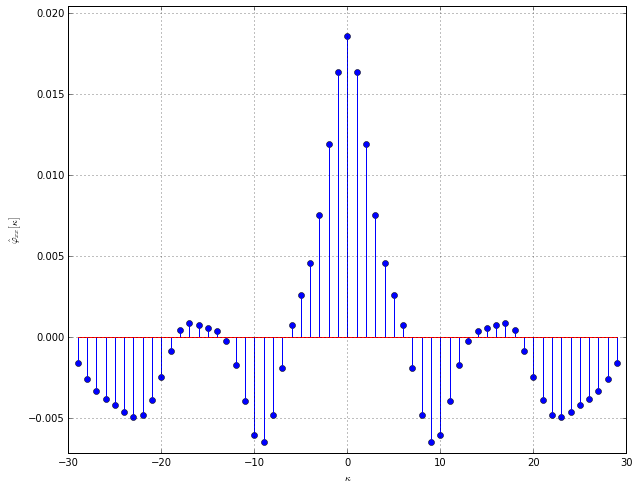

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

K = 30  # upper/lower limit for lag in ACF

# read audio file 
fs, x = wavfile.read('../data/speech_8k.wav')
x = np.asarray(x, dtype=float)/2**15

# compute and truncate ACF
acf = 1/len(x) * np.correlate(x, x, mode='full')
acf = acf[(len(x)-1)-(K-1):(len(x)-1)+K]
kappa = np.arange(-(K-1), K)

# plot ACF
fig = plt.figure(figsize = (10, 8))

plt.stem(kappa, acf)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\hat{\varphi}_{xx}[\kappa]$')
plt.axis([-K, K, 1.1*min(acf), 1.1*max(acf)]);
plt.grid()

**Exercise**

* Does the ACF fulfill the properties stated above?
* The plot shows only a small part of the ACF. Increase the range `K` for $-K \leq \kappa < K$ and check if the last property is fulfilled for the speech signal.
* Is the speech signal uncorrelated or correlated?

It can be observed that the plotted ACF has its maximum value at $\kappa = 0$ and that it shows an even symmetry. The third property can be confirmed by increasing `K` in above example. The speech signal is correlated since $\varphi_{xx}[\kappa] \neq 0$ for $\kappa \neq 0$.

## Auto-Covariance Function

The [auto-covariance function](https://en.wikipedia.org/wiki/Covariance) is defined as the ACF of a zero-mean random signal. For a random signal $x[k]$ with linear mean $\mu_x \neq 0$ it is given as

\begin{equation}
\psi_{xx}[\kappa] = \varphi_{xx}[\kappa] - \mu_x^2
\end{equation}

## Cross-Correlation Function

The cross-correlation function (CCF) is a measure of similarity that two random signals $x[k]$ and $y[k]$ show in a statistical sense.

### Definition

For a continuous-amplitude real-valued random signal $x[k]$ the CCF is defined by the [second-order ensemble avarage](ensemble_averages.ipynb#Second-Order-Ensemble-Averages) of the two signals $x[k]$ and $y[k]$ at two different time-instants $k_x$ and $k_y$

\begin{equation}
\varphi_{xy}[k_x, k_y] = E\{ x[k_x] \cdot y[k_y] \}
\end{equation}

Under the assumption of [wide-sense stationarity](stationary_ergodic.ipynb#Wide-Sense-Stationary-Random-Processes) (WSS) the CCF does only depend on the difference $\kappa = k_x - k_y$ between the considered sample indexes

\begin{equation}
\varphi_{xy}[\kappa] = E\{x[k] \cdot y[k - \kappa] \} = E\{x[k + \kappa] \cdot y[k] \}
\end{equation}

The cross-correlation function (CCF) is a measure of similarity that two random signals $x[k]$ and $y[k - \kappa]$ have with respect to the shift $\kappa \in \mathbb{Z}$. If $x[k]$ and $y[k]$ are wide-sense ergodic processes, the CCF can be computed by averaging along one sample function

\begin{equation}
\varphi_{xy}[\kappa] = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k] \cdot y[k-\kappa]
\end{equation}

For random signals $x_N[k] = \text{rect}_N[k] \cdot x[k]$ and $y_M[k] = \text{rect}_M[k] \cdot y[k]$ of finite lengths $N$ and $M$ one yields

\begin{equation}
\varphi_{xy}[\kappa] = \frac{1}{N} \sum_{k=0}^{N-1} x_N[k] \cdot y_M[k-\kappa] = \frac{1}{N} \; x_N[k] * y_M[-k]
\end{equation}

where the CCF $\varphi_{xy}[\kappa] = 0$ for $\kappa < -(M-1)$ and $\kappa > N-1$. The CCF can be computed by (fast) convolution of one random signal with a time reversed version of the other random signal. Note in numerical implementations (e.g. MATLAB, Python), the computed CCF is stored in a vector of length $N + M - 1$. The positive indexes $0, 1, \dots, N + M - 1$ of this vector cannot be directly interpreted as $\kappa$. The indexes of the vector have to be shifted by $M-1$ for a proper interpretation.

Above results hold also for the CCF $\varphi_{yx}[\kappa]$ when exchanging $x[k]$ with $y[k]$ and $N$ with $M$.

### Properties

1. The CCF exhibits the following symmetry when exchanging the two random signals

    $$ \varphi_{xy}[\kappa] = \varphi_{yx}[-\kappa] $$
    
2. The CCF is constant for [*uncorrelated*](https://en.wikipedia.org/wiki/Uncorrelated_random_variables) random signals

    $$ \varphi_{xy}[\kappa] = \mu_x \cdot \mu_y $$
    
3. Typical random processes are uncorrelated for $|\kappa| \to \infty$

    $$ \lim_{|\kappa| \to \infty} \varphi_{xy}[\kappa] = \mu_x \cdot \mu_y$$

### Example

The following example estimates and plots the CCF of two random signals $x[k]$ and $y[k]$ of finite lengths $N$ and $M = 2 N$.

Mean of signal x[k]: 1.954480
Mean of signal y[k]: 1.000330


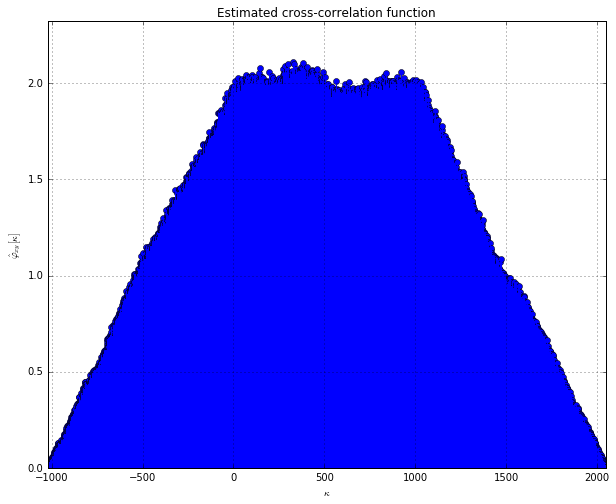

In [2]:
N = 1024  # length of random signals

# generate two uncorrelated random signals
np.random.seed(2)
x = 2 + np.random.normal(size=N)
y = 1 + np.random.normal(size=2*N)

# compute CCF
ccf = 1/len(x) * np.correlate(x, y, mode='full')
kappa = np.arange(-(N-1), 2*N)

# print mean values of signals
print('Mean of signal x[k]: %f' %np.mean(x))
print('Mean of signal y[k]: %f' %np.mean(y))

# plot CCF
plt.figure(figsize = (10, 8))
plt.stem(kappa, ccf)
plt.title('Estimated cross-correlation function')
plt.ylabel(r'$\hat{\varphi}_{xy}[\kappa]$')
plt.xlabel(r'$\kappa$')
plt.axis([kappa[0], kappa[-1], 0, 1.1*max(ccf)]);
plt.grid()

**Exercise**

* Can the signals be assumed to be correlated or uncorrelated when considering the CCF in the range $0 < \kappa < N$ only?
* Why does the CCF of two finite length signals have this overall trapezoid like shape? 
* What would be its theoretic value for signals of infinte length?

The CCF is approximately constant for $0 < \kappa < N$. Consequently, the random signals $x[k]$ and $y[k]$ can be assumed to be uncorrelated. The trapezoidal shape of the CCF results from the truncation of the random signals to a finite number of samples. This truncation can be modeled as a multiplication of the infinite length signals by a rectangular signal $\text{rect}_N[k]$ and $\text{rect}_M[k]$, respectively. Interpreting the CCF as convolution and having in mind that the convolution of two rectangular signals results in a signal of trapezoidal shape explains the shape of the CCF shown above. Its theoretic value is constant with a value given by the multiplication of the two linear means of the random signals $\varphi_{xy}[\kappa] = \mu_x \cdot \mu_y$.

## Cross-Covariance Function

The [cross-covariance function](https://en.wikipedia.org/wiki/Covariance) is defined as the CCF of two zero-mean random signals. For two random signals $x[k]$ and $y[k]$ with linear means $\mu_x \neq 0$ and $\mu_y \neq 0$ it is given as

\begin{equation}
\psi_{xy}[\kappa] = \varphi_{xy}[\kappa] - \mu_x \mu_y
\end{equation}

**Exercise**

* What would the plot for $\psi_{xy}[\kappa]$ look like for above example under the assumption of signals of infinite length?

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016*.